# (Diabetes)

# Define Libraries


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC     
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score , recall_score , f1_score  
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore") 

# define data 

In [2]:
path = "diabetes.csv"
data = pd.read_csv(path , sep=',')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# Explore Data

In [3]:
data.head(10) # u can add the number of rows that u need

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [4]:
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe() 

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
data.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
data.duplicated().sum()

0

# Analysis Data

In [9]:
data.corr()  

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

<Axes: >

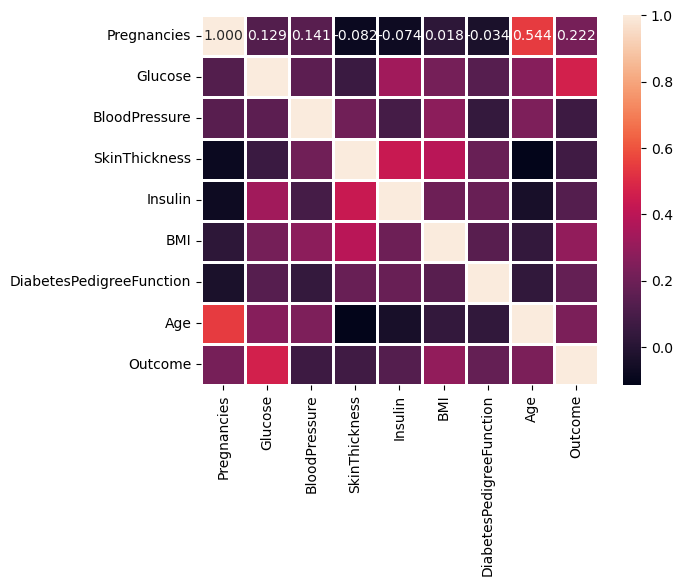

In [10]:
sns.heatmap(data.corr() , annot=True,fmt='0.3f',linewidth=0.9)  

<Axes: xlabel='Outcome', ylabel='count'>

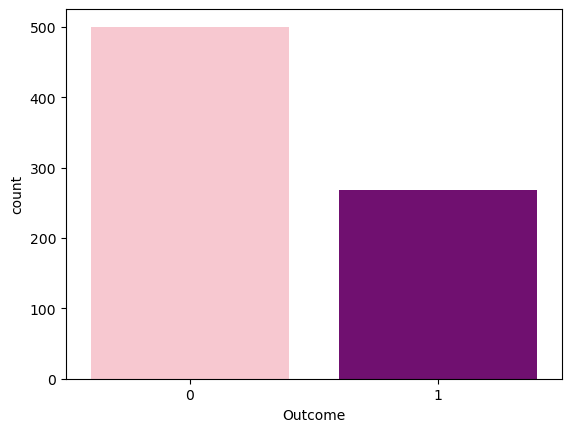

In [11]:
sns.countplot(x='Outcome',data=data,palette=['pink','purple']) 

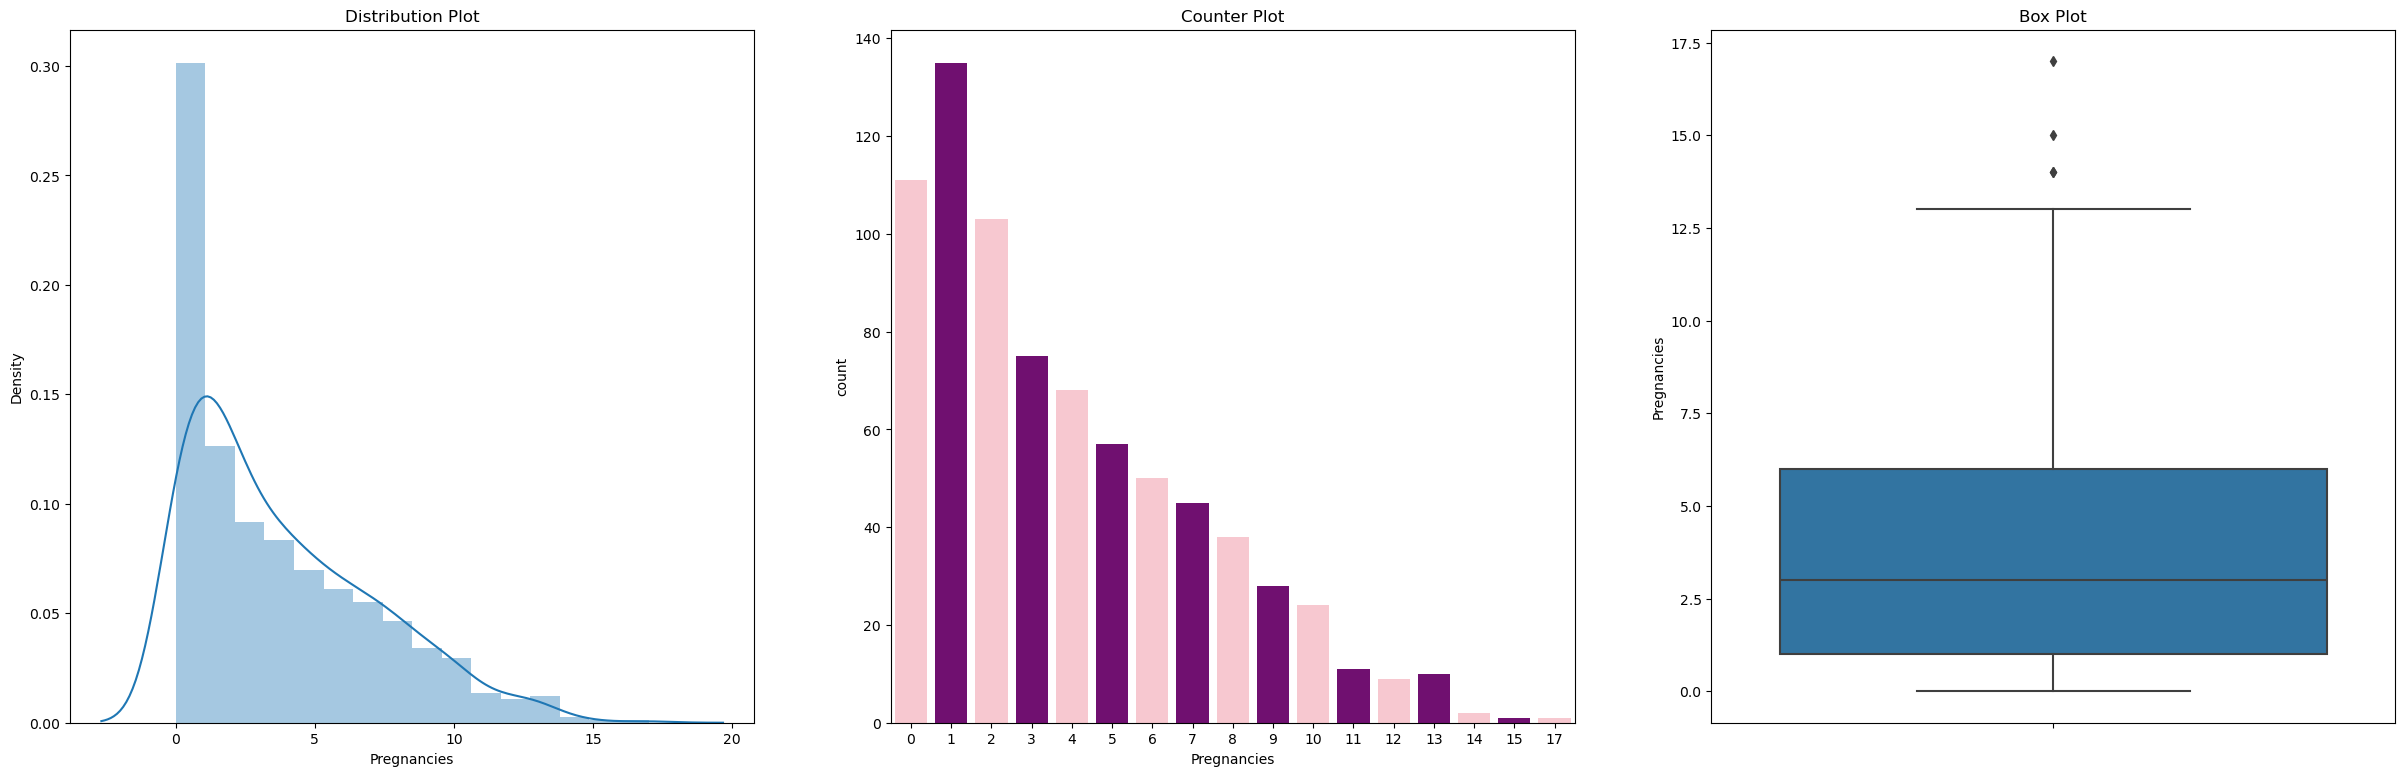

In [12]:
plt.figure(figsize=(30,9)) 

plt.subplot(1,3,2)  
plt.title('Counter Plot')
sns.countplot(x='Pregnancies' ,data=data,palette=['pink','purple'])

plt.subplot(1,3,1)  
plt.title('Distribution Plot') 
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)  
plt.title('Box Plot')
sns.boxplot(y=data['Pregnancies'])

plt.show() 

<Axes: >

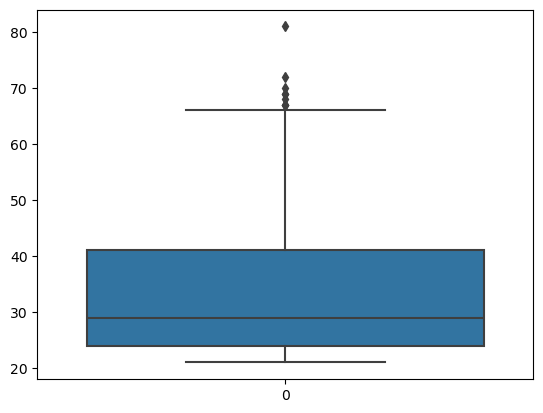

In [13]:
sns.boxplot(data.Age)

# Create Model 

In [14]:
x=data.drop('Outcome',axis=1)           
y=data['Outcome']             

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80)   

In [16]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier()


model1.fit(x_train,y_train) 

LogisticRegression()

In [17]:
pre=model1.predict(x_test)

In [18]:
acc=accuracy_score(pre,y_test)
rec=recall_score(pre,y_test)
f1=f1_score(pre,y_test)

In [19]:
confusion_matrix(pre,y_test)  

array([[82, 22],
       [19, 31]], dtype=int64)

<Axes: >

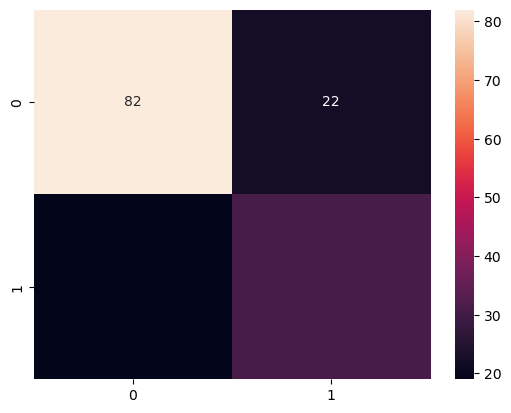

In [20]:
sns.heatmap(confusion_matrix(pre,y_test),annot=True)


In [21]:
columns = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [22]:
#here the same of above but i will organize it in function
# before call this func u should create model by use LogisticRegression
# model1=LogisticRegression()
def create_model(model):
    #بدرب الموديل ع مجموعة من الداتا 
    model.fit(x_train,y_train)
    #هون بخليه يعمل predict
    pre=model.predict(x_test)
    #هون مقاييس أدائه للموديل
    acc=accuracy_score(pre,y_test)
    rec=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)

    #store the res in lise >> this step im writing here cause i need in every time call this fun. store the result of all models
    result1.append(acc)
    result2.append(rec)
    result3.append(f1)
    
    #هون عملنا كونفيوجن ماتركس
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    #بطبع اسم الموديل ونتائج فحصه 
    print(model) 
    print("accuracy of your model is : ",acc,"and recall is : ",rec,"f1 score is : ",f1)

LogisticRegression()
accuracy of your model is :  0.7337662337662337 and recall is :  0.62 f1 score is :  0.6019417475728155


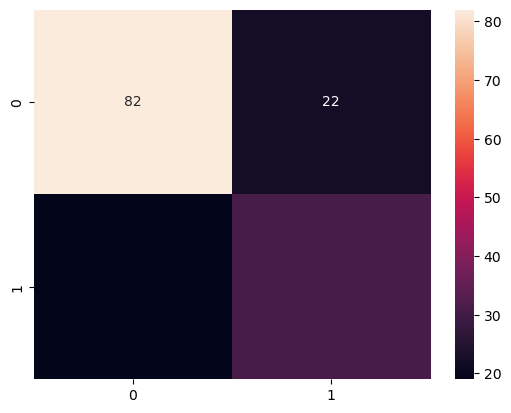

In [23]:
create_model(model1)

SVC()
accuracy of your model is :  0.7662337662337663 and recall is :  0.6888888888888889 f1 score is :  0.6326530612244898


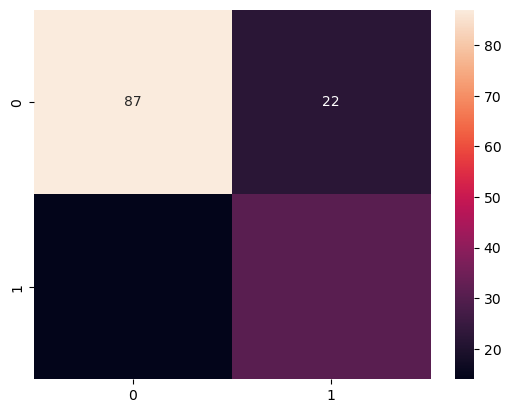

In [24]:
create_model(model2)

RandomForestClassifier()
accuracy of your model is :  0.7532467532467533 and recall is :  0.6470588235294118 f1 score is :  0.6346153846153846


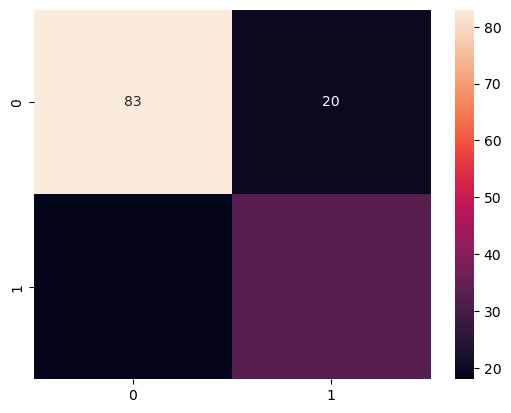

In [25]:
create_model(model3)

GradientBoostingClassifier()
accuracy of your model is :  0.7272727272727273 and recall is :  0.6222222222222222 f1 score is :  0.5714285714285714


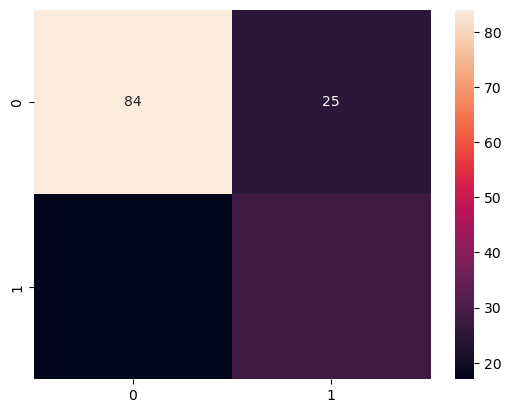

In [26]:
create_model(model4)

In [27]:
# print the results of this models to show what is the best model

In [28]:
result1

[0.7337662337662337,
 0.7662337662337663,
 0.7532467532467533,
 0.7272727272727273]

In [29]:
result2

[0.62, 0.6888888888888889, 0.6470588235294118, 0.6222222222222222]

In [30]:
result3

[0.6019417475728155,
 0.6326530612244898,
 0.6346153846153846,
 0.5714285714285714]

In [31]:
#i need to make res 1,2,3 data frame =(rows and columns)
pd.DataFrame({'algorithm': columns ,'accurasies':result1,'recalls':result2,'f1 scores':result3})
#store in variable
df=pd.DataFrame({'algorithm': columns ,'accurasies':result1,'recalls':result2,'f1 scores':result3})
df

algorithm  accurasies   recalls  f1 scores
0          LogisticRegression    0.733766  0.620000   0.601942
1                         SVC    0.766234  0.688889   0.632653
2      RandomForestClassifier    0.753247  0.647059   0.634615
3  GradientBoostingClassifier    0.727273  0.622222   0.571429

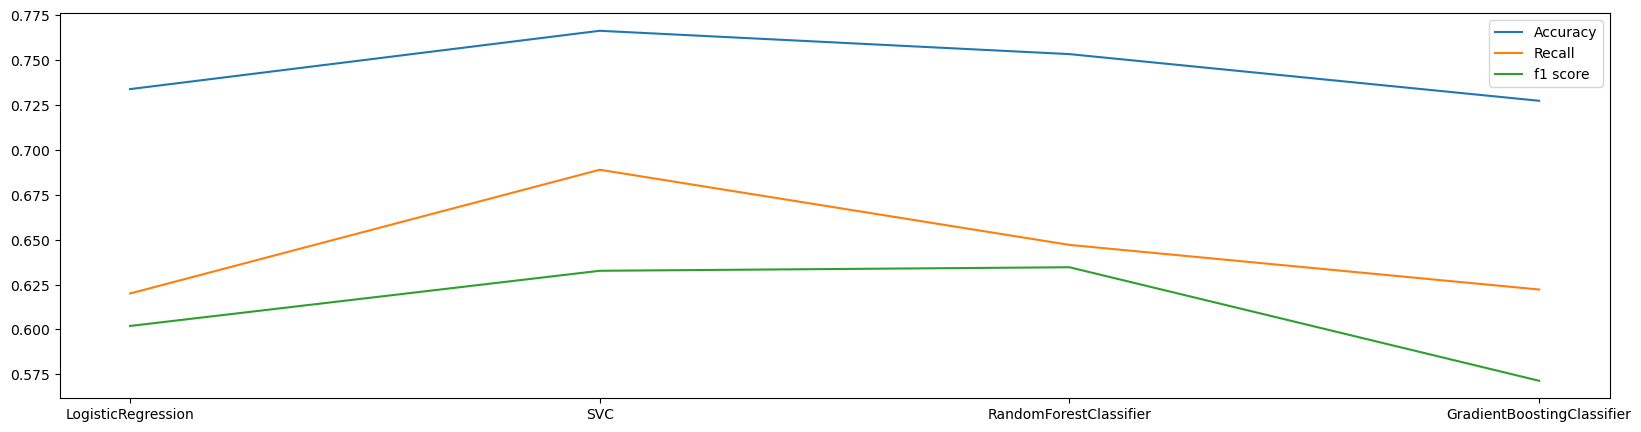

In [32]:
#make the last data frame figure
fig=plt.subplots(figsize=(20,5))
plt.plot(df.algorithm,result1,label='Accuracy')
plt.plot(df.algorithm,result2,label='Recall')
plt.plot(df.algorithm,result3,label='f1 score')
plt.legend()
plt.show()

# Finally, this is the most enjoyable moment  :)

# Done :) :) :) :) :) :) :) :) :) :) :)